In [72]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [73]:
plot = 'deloc'

if plot == 'unit':
    path_bands = '../VASP/2.2-bandstructure/output/'
    path_dos = '../VASP/2.1-DOS/output/'
    emin = 0.2
    emax = 0.2
elif plot == 'unit+u':
    path_bands = '../VASP/3.2-DFT+U_bandstructure/output/'
    path_dos = '../VASP/3.1-DFT+U_DOS/output/'
    emin = 0.2
    emax = 0.2
elif plot == 'deloc':
    #path_bands = '../VASP/7-polaron/5.2-delocalized_bands/output/'
    path_bands = '../VASP/7-polaron/5.2-delocalized_bands/output/'
    path_dos = '../VASP/7-polaron/5.1-delocalized_DOS/output/'
    emin = -1
    emax = -1
elif plot == 'polaron':
    path_bands = '../VASP/7-polaron/6-bands/output/'
    path_dos = '../VASP/7-polaron/4-DOS/output/'
    emin = 0
    emax = 7.5
else:
    assert(False)

In [74]:
df_band = pd.read_csv(path_bands + 'REFORMATTED_BAND.dat', header=None, skiprows=1, delim_whitespace=True)
df_dos = pd.read_csv(path_dos + 'TDOS.dat', header=None, skiprows=1, delim_whitespace=True, names = ['energy', 'dos'], index_col=False)
df_pdos = pd.read_csv(path_dos + 'PDOS_A1.dat', header=None, skiprows=1, delim_whitespace=True, names = ['energy', 's', 'p', 'd', 'dos'], index_col=False)

In [75]:
df_pdos.head()

,energy,s,p,d,dos
0,-63.44251,0.0,0.0,0.0,0.0
1,-63.40851,0.0,0.0,0.0,0.0
2,-63.37451,0.0,0.0,0.0,0.0
3,-63.34051,0.0,0.0,0.0,0.0
4,-63.30551,0.0,0.0,0.0,0.0


In [76]:
dos = df_dos.dos.to_numpy()
pdos = df_pdos.dos.to_numpy()
dos_energies = df_dos.energy.to_numpy()
efermi = 0
efermi_bands = 0#df_bands_fermi.loc[0,0]

if plot == 'unit' or plot == 'unit+u':
    N = 6
    k = 20
    ymin, ymax = (-3.5,4)
elif plot == 'deloc' or plot == 'polaron':
    N = 6*27
    k = 10
    ymin, ymax = (-4, 1.5)
else:
    assert(False)

dos = dos / N
pdos = pdos / N

In [77]:
bands = df_band.to_numpy().T[1:]  - efermi+ efermi_bands
band_energies = df_band.to_numpy().T[0]

In [78]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

text_width = 418.25368

# Using seaborn's style
plt.style.use('default')

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}

plt.rcParams.update(tex_fonts)

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [79]:
all_bands = bands

cbands = []
vbands = []

cbands = all_bands[all_bands > emax]
cbands.shape = (int(cbands.size / (9*k)), (9*k))
vbands = all_bands[all_bands < emin]
vbands.shape = (int(vbands.size / (9*k)), (9*k))

top_vband = np.max(vbands, axis=0)
bottom_vband = np.min(vbands, axis=0)
bottom_cband = np.min(cbands, axis=0)
top_cband = np.max(cbands, axis=0)

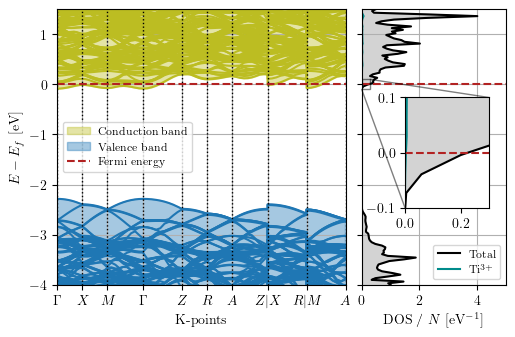

In [80]:
labels = [r'$\Gamma$', '$X$', '$M$', '$\Gamma$', '$Z$', '$R$', '$A$', r'$Z | X$' ,r'$R | M$', '$A$']
gap = k
slice = np.arange(0, (len(labels)-1)*gap, gap)
slice = np.append(slice, [-1])
kpoints = np.array(band_energies)[slice]

fig_size = set_size(text_width, 1)

fig = plt.figure(figsize=fig_size)
ax_bs, ax_dos = fig.subplots(1,2, sharey=True, gridspec_kw={'width_ratios': [2, 1]})
fig.subplots_adjust(wspace=0.075)

ax_bs.fill_between(band_energies, bottom_cband, top_cband, color='tab:olive', alpha=0.4, label='Conduction band')
ax_bs.fill_between(band_energies, bottom_vband, top_vband, color='tab:blue', alpha=0.4, label='Valence band')
ax_bs.plot(band_energies, cbands.T, color='tab:olive', alpha=1)
ax_bs.plot(band_energies, vbands.T, color='tab:blue', alpha=1)

ax_dos.fill_betweenx(dos_energies-efermi, dos, 0, color='lightgrey')
ax_dos.plot(dos, dos_energies-efermi, color='black', alpha=1, label='Total')

ax_bs.axhline(0, color='firebrick', linestyle='--', label='Fermi energy')
ax_dos.axhline(0, color='firebrick', linestyle='--')

if plot == 'deloc' or plot == 'polaron':
    ax_dos.fill_betweenx(dos_energies-efermi, pdos, 0, color='darkcyan', alpha = 0.4)
    ax_dos.plot(pdos, dos_energies-efermi, color='darkcyan', alpha=1, label='Ti$^{3+}$')
    axins = ax_dos.inset_axes([0.3, 0.28, 0.58, 0.4])
    axins.plot(pdos, dos_energies-efermi, color='darkcyan', alpha=1)
    axins.fill_betweenx(dos_energies-efermi, pdos, 0, color='darkcyan',alpha=0.4)
    axins.fill_betweenx(dos_energies-efermi, dos, 0, color='lightgrey')
    axins.plot(dos, dos_energies-efermi, color='black', alpha=1, label='Total')
    axins.axhline(0, color='firebrick', linestyle='--')

    axins.set_xlim(0, 0.3)
    axins.set_ylim(-0.1, 0.1)
    axins.grid(False)
    ax_dos.indicate_inset_zoom(axins, edgecolor="black")



for kpoint in kpoints:
    ax_bs.axvline(kpoint, color='black', linestyle=':', linewidth=1)

ax_bs.set_ylim(ymin, ymax)
ax_bs.set_xlim(0, band_energies[-1])
ax_dos.set_xlim(0,5)
ax_bs.grid()
ax_dos.grid()

ax_bs.set_ylabel(r'$E - E_f$ [eV]')
ax_bs.set_xlabel('K-points')
ax_bs.set_xticks(kpoints)
ax_bs.set_xticklabels(labels)
ax_dos.set_xlabel(r'DOS / $N$ [eV$^{-1}$]')
ax_dos.legend()
if plot == 'unit+u' or plot == 'unit':
    loc = (0.55,0.5)
else :
    loc = 'center left'
ax_bs.legend(loc=loc)

In [81]:
fig.savefig(plot +'.pdf', format='pdf', bbox_inches='tight')

In [82]:
plot

'deloc'